[Index] FRiP files indexed: 284


/var/folders/_r/b3mmx0vn61xg9lj08b924y_h0000gn/T/ipykernel_4861/2789127190.py:330: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


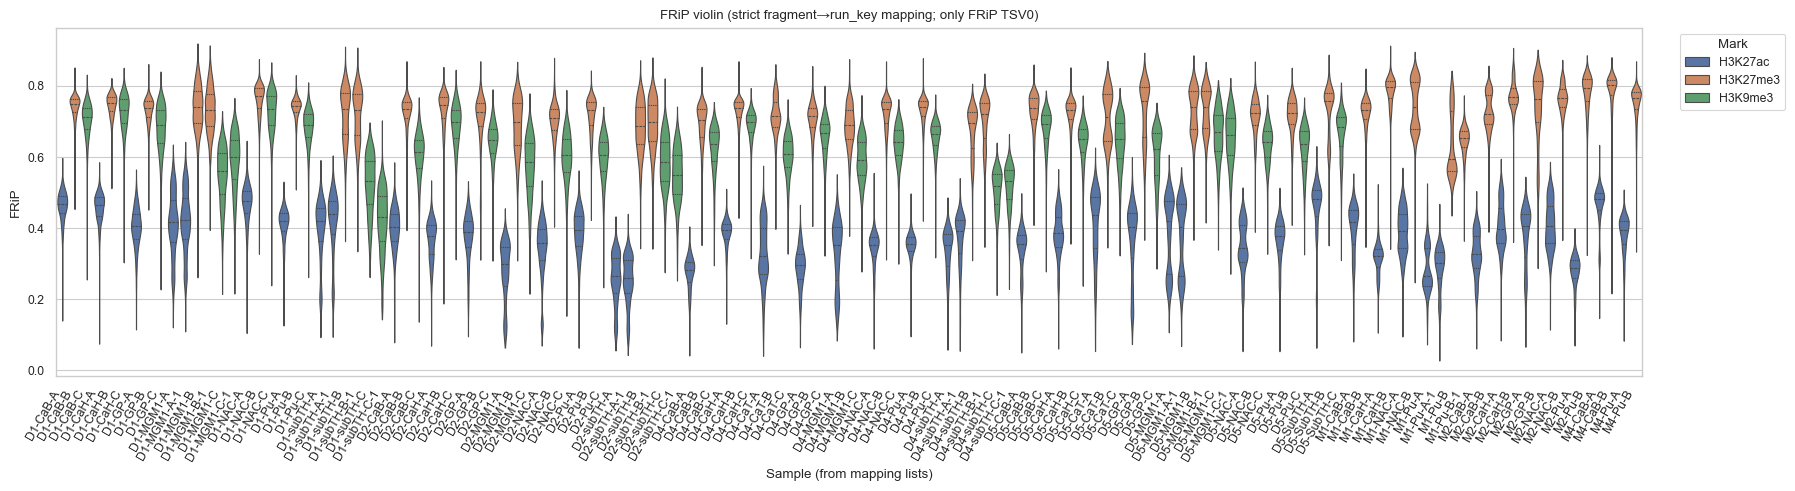

[Saved] QC_FRiP_violin_strictMapping_onlyFRiP_0130.pdf


In [2]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# 0) Input: directory containing all FRiP result files
# ===============================
FRIP_DIR = "/Users/likai/Downloads/BGC_FRiP_file"

# ===============================
# 1) Three file lists for each histone mark
#    Put your three pasted blocks here
# ===============================

# ---- H3K27ac (A) ----
files_H3K27ac = [
    ("D2-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC451_22FFKFLT4_clean_fragments.tsv.gz")),
("D2-MGM1-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC653_22FFKFLT4_clean_fragments.tsv.gz")),
("D1-MGM1-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC281_227YY5LT4_clean_fragments.tsv.gz")),
("D1-MGM1-A-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC282_227YY5LT4_clean_fragments.tsv.gz")),
("D2-CaH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC381_227YY5LT4_clean_fragments.tsv.gz")),
("D2-NAC-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC410_22FVN3LT4_clean_fragments.tsv.gz")),
("D2-GP-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC429_22FVN3LT4_clean_fragments.tsv.gz")),
("D2-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC438_22FVN3LT4_clean_fragments.tsv.gz")),
("D2-subTH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC565_22FVN3LT4_clean_fragments.tsv.gz")),
("D2-subTH-A-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC566_22FVN3LT4_clean_fragments.tsv.gz")),
("D1-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC117_22JGMLLT3_clean_fragments.tsv.gz")),
("D1-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC120_22JGMLLT3_clean_fragments.tsv.gz")),
("D1-GP-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC137_22JGMLLT3_clean_fragments.tsv.gz")),
("D1-NAC-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC212_22JMCNLT3_clean_fragments.tsv.gz")),
("D1-subTH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC259_22JMCNLT3_clean_fragments.tsv.gz")),
("D1-subTH-A-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC260_22JMCNLT3_clean_fragments.tsv.gz")),
("D1-CaH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZW-BC072_22HK7LLT3_clean_fragments.tsv.gz")),
("D4-CaH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGN61-BC787_22J2CKLT4_clean_fragments.tsv.gz")),
("D4-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGN61-BC790_22J2CKLT4_clean_fragments.tsv.gz")),
("D5-CaH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA052_clean_fragments.tsv.gz")),
("D5-NAC-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA055_clean_fragments.tsv.gz")),
("D5-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA058_clean_fragments.tsv.gz")),
("D5-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA061_clean_fragments.tsv.gz")),
("D4-CaT-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA064_clean_fragments.tsv.gz")),
("D5-GP-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA082_clean_fragments.tsv.gz")),
("D5-SubTH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA100_clean_fragments.tsv.gz")),
("D5-CaT-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA118_clean_fragments.tsv.gz")),
("D5-MGM1-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA141_clean_fragments.tsv.gz")),
("D5-MGM1-A-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA142_clean_fragments.tsv.gz")),
("D4-NAC-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC837_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-GP-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC905_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC908_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-subTH-A-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC953_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-MGM1-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC975_22JY5HLT4_clean_fragments.tsv.gz")),
("M2-NAC-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI185_fragments.tsv.gz")),
("M2-CaH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI187_fragments.tsv.gz")),
("M2-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI193_fragments.tsv.gz")),
("M1-CaH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI225_fragments.tsv.gz")),
("M1-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI227_fragments.tsv.gz")),
("M4-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI239_fragments.tsv.gz")),
("M1-NAC-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI241_fragments.tsv.gz")),
("M4-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI243_fragments.tsv.gz")),
("M1-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BC943_fragments.tsv.gz")),
("M2-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BC945_fragments.tsv.gz")),
("M2-GP-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI176_fragments.tsv.gz")),
("M1-Pu-A-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BA485_fragments.tsv.gz")), 
("D2-CaT-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/SM-OGR2N-BA194_clean_fragments.tsv.gz")), 
("D4-subTH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC952_22JY5HLT4_clean_fragments.tsv.gz")), 

]

# ---- H3K27me3 (B) ----
files_H3K27me3 = [

("D2-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC452_22FFKFLT4_clean_fragments.tsv.gz")),
("D2-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC459_22FFKFLT4_clean_fragments.tsv.gz")),
("D2-MGM1-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC654_22FFKFLT4_clean_fragments.tsv.gz")),
("D1-MGM1-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC283_227YY5LT4_clean_fragments.tsv.gz")),
("D1-MGM1-B-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC284_227YY5LT4_clean_fragments.tsv.gz")),
("D2-CaH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC382_227YY5LT4_clean_fragments.tsv.gz")),
("D2-NAC-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC411_22FVN3LT4_clean_fragments.tsv.gz")),
("D2-GP-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC430_22FVN3LT4_clean_fragments.tsv.gz")),

("D2-CaT-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/SM-OGR2N-BA195_clean_fragments.tsv.gz")),
    
("D2-subTH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC567_22FVN3LT4_clean_fragments.tsv.gz")),
("D2-subTH-B-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC568_22FVN3LT4_clean_fragments.tsv.gz")),
("D1-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC118_22JGMLLT3_clean_fragments.tsv.gz")),
("D1-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC121_22JGMLLT3_clean_fragments.tsv.gz")),
("D1-GP-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC167_22JGMLLT3_clean_fragments.tsv.gz")),
("D1-NAC-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC213_22JMCNLT3_clean_fragments.tsv.gz")),
("D1-subTH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC261_22JMCNLT3_clean_fragments.tsv.gz")),
("D1-subTH-B-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC262_22JMCNLT3_clean_fragments.tsv.gz")),
("D1-CaH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZW-BC074_22HK7LLT3_clean_fragments.tsv.gz")),
("D4-CaH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGN61-BC788_22J2CKLT4_clean_fragments.tsv.gz")),
("D4-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGN61-BC791_22J2CKLT4_clean_fragments.tsv.gz")),
("D5-CaH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA053_clean_fragments.tsv.gz")),
("D5-NAC-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA056_clean_fragments.tsv.gz")),
("D5-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA059_clean_fragments.tsv.gz")),
("D5-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA062_clean_fragments.tsv.gz")),
("D4-CaT-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA065_clean_fragments.tsv.gz")),
("D5-GP-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA083_clean_fragments.tsv.gz")),
("D5-SubTH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA101_clean_fragments.tsv.gz")),
("D5-CaT-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA119_clean_fragments.tsv.gz")),
("D5-MGM1-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA143_clean_fragments.tsv.gz")),
("D5-MGM1-B-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA144_clean_fragments.tsv.gz")),
("D4-NAC-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC838_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-GP-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC906_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC909_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-subTH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC954_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-subTH-B-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC955_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-MGM1-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC976_22JY5HLT4_clean_fragments.tsv.gz")),
    
("M2-NAC-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI186_fragments.tsv.gz")),
("M2-CaH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI188_fragments.tsv.gz")),
("M2-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI194_fragments.tsv.gz")),
("M1-CaH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI226_fragments.tsv.gz")),
("M1-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI228_fragments.tsv.gz")),
("M4-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI240_fragments.tsv.gz")),
("M1-NAC-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI242_fragments.tsv.gz")),
("M4-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI244_fragments.tsv.gz")),
("M1-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BC944_fragments.tsv.gz")),
("M2-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BC946_fragments.tsv.gz")),
("M2-GP-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI177_fragments.tsv.gz")),
("M1-Pu-B-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BA486_fragments.tsv.gz"))
]

# ---- H3K9me3 (C) ----
files_H3K9me3 = [
("D2-Pu-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC453_22FFKFLT4_clean_fragments.tsv.gz")),
("D2-CaB-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC460_22FFKFLT4_clean_fragments.tsv.gz")),
("D2-MGM1-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC655_22FFKFLT4_clean_fragments.tsv.gz")),
("D1-subTH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC273_227YY5LT4_clean_fragments.tsv.gz")),
("D1-subTH-C-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC274_227YY5LT4_clean_fragments.tsv.gz")),
("D1-MGM1-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC285_227YY5LT4_clean_fragments.tsv.gz")),
("D1-MGM1-C-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC286_227YY5LT4_clean_fragments.tsv.gz")),
("D2-CaH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC383_227YY5LT4_clean_fragments.tsv.gz")),
("D2-NAC-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC412_22FVN3LT4_clean_fragments.tsv.gz")),
("D2-GP-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC431_22FVN3LT4_clean_fragments.tsv.gz")),
("D2-subTH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC569_22FVN3LT4_clean_fragments.tsv.gz")),
("D2-subTH-C-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC570_22FVN3LT4_clean_fragments.tsv.gz")),
("D1-CaB-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC119_22JGMLLT3_clean_fragments.tsv.gz")),
("D1-Pu-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC122_22JGMLLT3_clean_fragments.tsv.gz")),
("D1-GP-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC168_22JGMLLT3_clean_fragments.tsv.gz")),
("D1-NAC-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC214_22JMCNLT3_clean_fragments.tsv.gz")),
("D1-CaH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZW-BC073_22HK7LLT3_clean_fragments.tsv.gz")),
("D4-CaH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGN61-BC789_22J2CKLT4_clean_fragments.tsv.gz")),
("D4-Pu-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGN61-BC792_22J2CKLT4_clean_fragments.tsv.gz")),
("D5-CaH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA054_clean_fragments.tsv.gz")),
("D5-NAC-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA057_clean_fragments.tsv.gz")),
("D5-CaB-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA060_clean_fragments.tsv.gz")),
("D5-Pu-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA063_clean_fragments.tsv.gz")),
("D4-CaT-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA066_clean_fragments.tsv.gz")),
("D5-GP-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA084_clean_fragments.tsv.gz")),
("D5-SubTH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA102_clean_fragments.tsv.gz")),
("D5-CaT-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA120_clean_fragments.tsv.gz")),
("D5-MGM1-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA145_clean_fragments.tsv.gz")),
("D5-MGM1-C-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA146_clean_fragments.tsv.gz")),
("D4-NAC-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC839_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-GP-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC907_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-CaB-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC910_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-subTH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC956_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-subTH-C-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC957_22JY5HLT4_clean_fragments.tsv.gz")),
("D4-MGM1-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC977_22JY5HLT4_clean_fragments.tsv.gz")),
("D2-CaT-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/SM-OGR2N-BA196_clean_fragments.tsv.gz"))
]


FILES_BY_MARK = {
    "H3K27ac": files_H3K27ac,
    "H3K27me3": files_H3K27me3,
    "H3K9me3": files_H3K9me3,
}

# ===============================
# 2) Rule for determining peak type
#    A -> narrow peaks
#    B/C -> broad peaks
# ===============================
def mark_to_peak_type(mark: str) -> str:
    if mark == "H3K27ac":
        return "narrow"
    if mark in ("H3K27me3", "H3K9me3"):
        return "broad"
    raise ValueError(f"Unknown mark: {mark}")

# ===============================
# 3) Extract run_key from fragment file name
#    Examples:
#      SM-NEIZO-BC451_... -> SM-NEIZO-BC451
#      BI185_fragments... -> BI185
#      BA485_fragments... -> BA485
# ===============================
def extract_run_key(fragment_path: str) -> str:
    base = os.path.basename(fragment_path)

    m = re.search(r"(SM-[A-Z0-9]+-[A-Z0-9]+)", base)
    if m:
        return m.group(1)

    m2 = re.match(r"^(BA\d+|BC\d+|BI\d+)", base)
    if m2:
        return m2.group(1)

    raise ValueError(f"Cannot parse run_key from fragment file name: {base}")

# ===============================
# 4) Build FRiP file index
#    Map (run_key, peak_type) -> FRiP file path
#    Supports:
#      FRiP_SM-NEIZU-BC188_....clean.narrow_all-dup.tsv
#      FRiP_BA485.broad_all-dup.tsv
# ===============================
def build_frip_index(frip_dir: str):
    idx = {}
    collisions = []

    for fn in os.listdir(frip_dir):
        if not fn.startswith("FRiP_") or not fn.endswith("_all-dup.tsv"):
            continue

        if ".narrow_all-dup.tsv" in fn:
            peak_type = "narrow"
        elif ".broad_all-dup.tsv" in fn:
            peak_type = "broad"
        else:
            continue

        # extract run_key
        m = re.search(r"FRiP_(SM-[A-Z0-9]+-[A-Z0-9]+)", fn)
        if m:
            run_key = m.group(1)
        else:
            m2 = re.search(r"FRiP_(BA\d+|BC\d+|BI\d+)", fn)
            if not m2:
                continue
            run_key = m2.group(1)

        key = (run_key, peak_type)
        path = os.path.join(frip_dir, fn)

        # handle duplicated keys: prefer files containing "clean"
        if key in idx:
            old = idx[key]
            old_clean = ("clean" in os.path.basename(old))
            new_clean = ("clean" in fn)
            if (not old_clean) and new_clean:
                idx[key] = path
            else:
                collisions.append((key, old, path))
        else:
            idx[key] = path

    return idx, collisions


frip_index, collisions = build_frip_index(FRIP_DIR)
print(f"[Index] FRiP files indexed: {len(frip_index):,}")

if collisions:
    print(f"[Index] Collisions found (kept preferred file): {len(collisions)}")
    for c in collisions[:10]:
        print("  ", c[0], "kept:", os.path.basename(c[1]), "ignored:", os.path.basename(c[2]))

# ===============================
# 5) Read a FRiP TSV file
#    Assumes first four columns:
#      barcode | total_reads | reads_in_peaks | frip
# ===============================
def read_frip_tsv(tsv: str) -> pd.DataFrame:
    df = pd.read_csv(tsv, sep="\t", header=None, comment="#")
    if df.shape[1] < 4:
        raise ValueError(f"Unexpected FRiP TSV columns (<4): {tsv} shape={df.shape}")

    df = df.iloc[:, :4].copy()
    df.columns = ["barcode", "total_reads", "reads_in_peaks", "frip"]

    df["total_reads"] = pd.to_numeric(df["total_reads"], errors="coerce")
    df["frip"] = pd.to_numeric(df["frip"], errors="coerce")
    df = df.dropna(subset=["total_reads", "frip"])
    return df

# ===============================
# 6) Strict matching:
#    fragment -> run_key
#    mark -> peak_type
#    then load the corresponding FRiP file
# ===============================
all_rows = []
missing = []

for mark, files_list in FILES_BY_MARK.items():
    peak_type = mark_to_peak_type(mark)

    for sample_name, frag_path in files_list:
        run_key = extract_run_key(frag_path)
        key = (run_key, peak_type)

        if key not in frip_index:
            missing.append((mark, sample_name, run_key, peak_type))
            continue

        tsv = frip_index[key]
        fdf = read_frip_tsv(tsv)

        fdf["mark"] = mark
        fdf["peak_type"] = peak_type
        fdf["sample"] = sample_name
        fdf["run_key"] = run_key
        fdf["frip_file"] = os.path.basename(tsv)

        all_rows.append(fdf)

if not all_rows:
    raise RuntimeError("No FRiP tables loaded. Check FRIP_DIR and file lists.")

frip_all = pd.concat(all_rows, ignore_index=True)

# ===============================
# 7) Filter: keep cells with total_reads > 500
# ===============================
frip_all = frip_all[frip_all["total_reads"] > 500].copy()

# ===============================
# 8) Plot violin plot (x=sample, hue=mark)
# ===============================
sns.set(style="whitegrid", context="paper")
plt.figure(figsize=(18, 5))

sample_order = sorted(frip_all["sample"].unique())

ax = sns.violinplot(
    data=frip_all,
    x="sample",
    y="frip",
    hue="mark",
    order=sample_order,
    cut=0,
    scale="width",
    inner="quartile",
    linewidth=0.8,
)

ax.set_xlabel("Sample (from mapping lists)")
ax.set_ylabel("FRiP")
ax.set_title("FRiP violin (strict fragment→run_key mapping; only FRiP TSV0)")
ax.legend(title="Mark", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.xticks(rotation=60, ha="right")
plt.tight_layout()

out_pdf = "QC_FRiP_violin_strictMapping_onlyFRiP_0130.pdf"
plt.savefig(out_pdf, dpi=300)
plt.show()

print(f"[Saved] {out_pdf}")

In [5]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# ===============================
# 0) Input: FRiP directory + output directory
# ===============================
FRIP_DIR = "/Users/likai/Downloads/BGC_FRiP_file"
OUT_DIR = os.path.join(FRIP_DIR, "plots_from_FRiP_only")
os.makedirs(OUT_DIR, exist_ok=True)


# ===============================
# 1) Three files lists (already pasted by you; keep unchanged)
# ===============================

# ---- H3K27ac (A) ----
files_H3K27ac = [
    ("D2-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC451_22FFKFLT4_clean_fragments.tsv.gz")),
    ("D2-MGM1-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC653_22FFKFLT4_clean_fragments.tsv.gz")),
    ("D1-MGM1-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC281_227YY5LT4_clean_fragments.tsv.gz")),
    ("D1-MGM1-A-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC282_227YY5LT4_clean_fragments.tsv.gz")),
    ("D2-CaH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC381_227YY5LT4_clean_fragments.tsv.gz")),
    ("D2-NAC-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC410_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D2-GP-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC429_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D2-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC438_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D2-subTH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC565_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D2-subTH-A-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC566_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D1-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC117_22JGMLLT3_clean_fragments.tsv.gz")),
    ("D1-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC120_22JGMLLT3_clean_fragments.tsv.gz")),
    ("D1-GP-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC137_22JGMLLT3_clean_fragments.tsv.gz")),
    ("D1-NAC-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC212_22JMCNLT3_clean_fragments.tsv.gz")),
    ("D1-subTH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC259_22JMCNLT3_clean_fragments.tsv.gz")),
    ("D1-subTH-A-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC260_22JMCNLT3_clean_fragments.tsv.gz")),
    ("D1-CaH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZW-BC072_22HK7LLT3_clean_fragments.tsv.gz")),
    ("D4-CaH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGN61-BC787_22J2CKLT4_clean_fragments.tsv.gz")),
    ("D4-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGN61-BC790_22J2CKLT4_clean_fragments.tsv.gz")),
    ("D5-CaH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA052_clean_fragments.tsv.gz")),
    ("D5-NAC-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA055_clean_fragments.tsv.gz")),
    ("D5-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA058_clean_fragments.tsv.gz")),
    ("D5-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA061_clean_fragments.tsv.gz")),
    ("D4-CaT-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA064_clean_fragments.tsv.gz")),
    ("D5-GP-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA082_clean_fragments.tsv.gz")),
    ("D5-SubTH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA100_clean_fragments.tsv.gz")),
    ("D5-CaT-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA118_clean_fragments.tsv.gz")),
    ("D5-MGM1-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA141_clean_fragments.tsv.gz")),
    ("D5-MGM1-A-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA142_clean_fragments.tsv.gz")),
    ("D4-NAC-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC837_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-GP-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC905_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC908_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-subTH-A-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC953_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-MGM1-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC975_22JY5HLT4_clean_fragments.tsv.gz")),
    ("M2-NAC-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI185_fragments.tsv.gz")),
    ("M2-CaH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI187_fragments.tsv.gz")),
    ("M2-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI193_fragments.tsv.gz")),
    ("M1-CaH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI225_fragments.tsv.gz")),
    ("M1-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI227_fragments.tsv.gz")),
    ("M4-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI239_fragments.tsv.gz")),
    ("M1-NAC-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI241_fragments.tsv.gz")),
    ("M4-Pu-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI243_fragments.tsv.gz")),
    ("M1-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BC943_fragments.tsv.gz")),
    ("M2-CaB-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BC945_fragments.tsv.gz")),
    ("M2-GP-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI176_fragments.tsv.gz")),
    ("M1-Pu-A-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BA485_fragments.tsv.gz")),
    ("D2-CaT-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/SM-OGR2N-BA194_clean_fragments.tsv.gz")),
    ("D4-subTH-A", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC952_22JY5HLT4_clean_fragments.tsv.gz")),
]

# ---- H3K27me3 (B) ----
files_H3K27me3 = [
    ("D2-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC452_22FFKFLT4_clean_fragments.tsv.gz")),
    ("D2-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC459_22FFKFLT4_clean_fragments.tsv.gz")),
    ("D2-MGM1-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC654_22FFKFLT4_clean_fragments.tsv.gz")),
    ("D1-MGM1-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC283_227YY5LT4_clean_fragments.tsv.gz")),
    ("D1-MGM1-B-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC284_227YY5LT4_clean_fragments.tsv.gz")),
    ("D2-CaH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC382_227YY5LT4_clean_fragments.tsv.gz")),
    ("D2-NAC-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC411_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D2-GP-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC430_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D2-CaT-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/SM-OGR2N-BA195_clean_fragments.tsv.gz")),
    ("D2-subTH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC567_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D2-subTH-B-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC568_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D1-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC118_22JGMLLT3_clean_fragments.tsv.gz")),
    ("D1-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC121_22JGMLLT3_clean_fragments.tsv.gz")),
    ("D1-GP-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC167_22JGMLLT3_clean_fragments.tsv.gz")),
    ("D1-NAC-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC213_22JMCNLT3_clean_fragments.tsv.gz")),
    ("D1-subTH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC261_22JMCNLT3_clean_fragments.tsv.gz")),
    ("D1-subTH-B-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC262_22JMCNLT3_clean_fragments.tsv.gz")),
    ("D1-CaH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZW-BC074_22HK7LLT3_clean_fragments.tsv.gz")),
    ("D4-CaH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGN61-BC788_22J2CKLT4_clean_fragments.tsv.gz")),
    ("D4-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGN61-BC791_22J2CKLT4_clean_fragments.tsv.gz")),
    ("D5-CaH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA053_clean_fragments.tsv.gz")),
    ("D5-NAC-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA056_clean_fragments.tsv.gz")),
    ("D5-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA059_clean_fragments.tsv.gz")),
    ("D5-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA062_clean_fragments.tsv.gz")),
    ("D4-CaT-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA065_clean_fragments.tsv.gz")),
    ("D5-GP-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA083_clean_fragments.tsv.gz")),
    ("D5-SubTH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA101_clean_fragments.tsv.gz")),
    ("D5-CaT-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA119_clean_fragments.tsv.gz")),
    ("D5-MGM1-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA143_clean_fragments.tsv.gz")),
    ("D5-MGM1-B-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA144_clean_fragments.tsv.gz")),
    ("D4-NAC-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC838_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-GP-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC906_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC909_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-subTH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC954_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-subTH-B-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC955_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-MGM1-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC976_22JY5HLT4_clean_fragments.tsv.gz")),
    ("M2-NAC-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI186_fragments.tsv.gz")),
    ("M2-CaH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI188_fragments.tsv.gz")),
    ("M2-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI194_fragments.tsv.gz")),
    ("M1-CaH-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI226_fragments.tsv.gz")),
    ("M1-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI228_fragments.tsv.gz")),
    ("M4-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI240_fragments.tsv.gz")),
    ("M1-NAC-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI242_fragments.tsv.gz")),
    ("M4-Pu-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI244_fragments.tsv.gz")),
    ("M1-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BC944_fragments.tsv.gz")),
    ("M2-CaB-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BC946_fragments.tsv.gz")),
    ("M2-GP-B", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BI177_fragments.tsv.gz")),
    ("M1-Pu-B-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/BA486_fragments.tsv.gz")),
]

# ---- H3K9me3 (C) ----
files_H3K9me3 = [
    ("D2-Pu-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC453_22FFKFLT4_clean_fragments.tsv.gz")),
    ("D2-CaB-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC460_22FFKFLT4_clean_fragments.tsv.gz")),
    ("D2-MGM1-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZO-BC655_22FFKFLT4_clean_fragments.tsv.gz")),
    ("D1-subTH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC273_227YY5LT4_clean_fragments.tsv.gz")),
    ("D1-subTH-C-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC274_227YY5LT4_clean_fragments.tsv.gz")),
    ("D1-MGM1-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC285_227YY5LT4_clean_fragments.tsv.gz")),
    ("D1-MGM1-C-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC286_227YY5LT4_clean_fragments.tsv.gz")),
    ("D2-CaH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZP-BC383_227YY5LT4_clean_fragments.tsv.gz")),
    ("D2-NAC-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC412_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D2-GP-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC431_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D2-subTH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC569_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D2-subTH-C-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZQ-BC570_22FVN3LT4_clean_fragments.tsv.gz")),
    ("D1-CaB-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC119_22JGMLLT3_clean_fragments.tsv.gz")),
    ("D1-Pu-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC122_22JGMLLT3_clean_fragments.tsv.gz")),
    ("D1-GP-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZU-BC168_22JGMLLT3_clean_fragments.tsv.gz")),
    ("D1-NAC-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZV-BC214_22JMCNLT3_clean_fragments.tsv.gz")),
    ("D1-CaH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-NEIZW-BC073_22HK7LLT3_clean_fragments.tsv.gz")),
    ("D4-CaH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGN61-BC789_22J2CKLT4_clean_fragments.tsv.gz")),
    ("D4-Pu-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGN61-BC792_22J2CKLT4_clean_fragments.tsv.gz")),
    ("D5-CaH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA054_clean_fragments.tsv.gz")),
    ("D5-NAC-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA057_clean_fragments.tsv.gz")),
    ("D5-CaB-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA060_clean_fragments.tsv.gz")),
    ("D5-Pu-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA063_clean_fragments.tsv.gz")),
    ("D4-CaT-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA066_clean_fragments.tsv.gz")),
    ("D5-GP-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA084_clean_fragments.tsv.gz")),
    ("D5-SubTH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA102_clean_fragments.tsv.gz")),
    ("D5-CaT-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA120_clean_fragments.tsv.gz")),
    ("D5-MGM1-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA145_clean_fragments.tsv.gz")),
    ("D5-MGM1-C-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR23-BA146_clean_fragments.tsv.gz")),
    ("D4-NAC-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC839_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-GP-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC907_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-CaB-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC910_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-subTH-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC956_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-subTH-C-1", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC957_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D4-MGM1-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/SM-OGR2O-BC977_22JY5HLT4_clean_fragments.tsv.gz")),
    ("D2-CaT-C", ("/Volumes/Kai_T7_1/BICAN_DNA_fragment_file/MiniAtalas_15K_h5ad_file/SM-OGR2N-BA196_clean_fragments.tsv.gz")),
]

FILES_BY_MARK = {
    "H3K27ac": files_H3K27ac,
    "H3K27me3": files_H3K27me3,
    "H3K9me3": files_H3K9me3,
}


# ===============================
# 2) Peak type rule: A->narrow, B/C->broad
# ===============================
def mark_to_peak_type(mark: str) -> str:
    if mark == "H3K27ac":
        return "narrow"
    if mark in ("H3K27me3", "H3K9me3"):
        return "broad"
    raise ValueError(f"Unknown mark: {mark}")


# ===============================
# 3) Extract run_key from fragments path
# ===============================
def extract_run_key(fragment_path: str) -> str:
    if isinstance(fragment_path, (tuple, list)):
        fragment_path = fragment_path[0]
    base = os.path.basename(str(fragment_path))

    m = re.search(r"(SM-[A-Z0-9]+-[A-Z0-9]+)", base)
    if m:
        return m.group(1)

    m2 = re.match(r"^(BA\d+|BC\d+|BI\d+)", base)
    if m2:
        return m2.group(1)

    raise ValueError(f"Cannot parse run_key from fragment file name: {base}")


def last_token(run_key: str) -> str:
    """SM-OGR23-BA052 -> BA052 ; SM-NEIZO-BC451 -> BC451 ; BA485 -> BA485"""
    rk = str(run_key)
    if rk.startswith("SM-") and "-" in rk:
        return rk.split("-")[-1]
    return rk


# ===============================
# 4) Build FRiP index: (run_key, peak_type) -> filepath
# ===============================
def build_frip_index(frip_dir: str):
    idx = {}
    collisions = []

    for fn in os.listdir(frip_dir):
        if not fn.startswith("FRiP_") or not fn.endswith(".tsv"):
            continue

        if ".narrow" in fn:
            peak_type = "narrow"
        elif ".broad" in fn:
            peak_type = "broad"
        else:
            continue

        # Typical: FRiP_SM-NEIZU-BC188_...clean.narrow_all-dup.tsv
        m = re.match(r"^FRiP_(SM-[A-Za-z0-9]+-[A-Za-z0-9]+)_.+\.(narrow|broad)", fn)
        if m:
            run_key = m.group(1)
        else:
            # Typical: FRiP_BA485.broad_all-dup.tsv
            m2 = re.match(r"^FRiP_([A-Za-z]{2}\d+)\.(narrow|broad)", fn)
            if not m2:
                continue
            run_key = m2.group(1)

        key = (run_key, peak_type)
        path = os.path.join(frip_dir, fn)

        # If duplicated keys exist, prefer filenames containing "clean"
        if key in idx:
            old = idx[key]
            old_clean = ("clean" in os.path.basename(old))
            new_clean = ("clean" in fn)
            if (not old_clean) and new_clean:
                idx[key] = path
            else:
                collisions.append((key, old, path))
        else:
            idx[key] = path

    return idx, collisions


frip_index, collisions = build_frip_index(FRIP_DIR)
print(f"[Index] FRiP files indexed: {len(frip_index):,}")
if collisions:
    print(f"[Index] Collisions found (kept preferred file): {len(collisions)}")
    for c in collisions[:10]:
        print("  ", c[0], "kept:", os.path.basename(c[1]), "ignored:", os.path.basename(c[2]))
    if len(collisions) > 10:
        print("  ...")


# ===============================
# 5) Read FRiP TSV
# ===============================
def read_frip_tsv(tsv: str) -> pd.DataFrame:
    df = pd.read_csv(tsv, sep="\t", header=None, comment="#")
    if df.shape[1] < 4:
        raise ValueError(f"Unexpected FRiP TSV columns (<4): {tsv} shape={df.shape}")

    df = df.iloc[:, :4].copy()
    df.columns = ["barcode", "total_reads", "reads_in_peaks", "frip"]
    df["total_reads"] = pd.to_numeric(df["total_reads"], errors="coerce")
    df["frip"] = pd.to_numeric(df["frip"], errors="coerce")
    df = df.dropna(subset=["total_reads", "frip"])
    return df


# ===============================
# 6) Normalize region names (subTH -> STH; merge case/-1/_)
# ===============================
region_order = ["CaB", "CaH", "CaT", "GP", "MGM1", "NAC", "Pu", "STH"]

def normalize_region(x):
    if pd.isna(x):
        return np.nan
    x = str(x)
    x = x.replace("-1", "").replace("_", "").replace(" ", "")
    x = x.upper()
    mapping = {
        "CAB": "CaB",
        "CAH": "CaH",
        "CAT": "CaT",
        "GP": "GP",
        "MGM1": "MGM1",
        "NAC": "NAC",
        "PU": "Pu",
        "SUBTH": "STH",
        "STH": "STH",
    }
    return mapping.get(x, np.nan)


# ===============================
# 7) Parse donor/region/replicate from sample name
#    e.g. D1-subTH-A-1 -> donor=D1 region=subTH rep=1
# ===============================
def parse_sample(sample_name: str):
    s = str(sample_name).strip()
    parts = s.split("-")
    donor = parts[0] if len(parts) >= 1 else "NA"
    region = parts[1] if len(parts) >= 2 else "NA"

    # If the last token is a number, treat it as replicate id; otherwise rep=0
    rep = 0
    if len(parts) >= 4 and parts[-1].isdigit():
        rep = int(parts[-1])
    return donor, region, rep


# ===============================
# 8) Load all FRiP tables (strict mapping + fallback using last_token)
# ===============================
all_rows = []
missing = []

for mark, files_list in FILES_BY_MARK.items():
    peak_type = mark_to_peak_type(mark)

    for sample_name, frag_path in files_list:
        run_key = extract_run_key(frag_path)   # SM-NEIZO-BC451 / BA485 / BI185
        run_key2 = last_token(run_key)         # BC451 / BA485 / BI185
        key1 = (run_key, peak_type)
        key2 = (run_key2, peak_type)

        tsv = None
        if key1 in frip_index:
            tsv = frip_index[key1]
            run_key_hit = run_key
        elif key2 in frip_index:
            tsv = frip_index[key2]
            run_key_hit = run_key2
        else:
            missing.append((mark, sample_name, run_key, peak_type))
            continue

        fdf = read_frip_tsv(tsv)

        donor, region_raw, rep = parse_sample(sample_name)
        region_clean = normalize_region(region_raw)

        fdf["mark"] = mark
        fdf["peak_type"] = peak_type
        fdf["sample"] = sample_name
        fdf["run_key"] = run_key
        fdf["run_key_hit"] = run_key_hit
        fdf["donor"] = donor
        fdf["region"] = region_raw
        fdf["region_clean"] = region_clean
        fdf["replicate"] = rep
        fdf["frip_file"] = os.path.basename(tsv)

        all_rows.append(fdf)

if missing:
    print("\n[Missing] These mappings not found in FRIP_DIR (run_key + peak_type):")
    for m in missing[:50]:
        print(" ", m)
    if len(missing) > 50:
        print(f" ... ({len(missing)} total)")

if not all_rows:
    raise RuntimeError("No FRiP tables loaded. Check FRIP_DIR and the three files lists.")

frip_all = pd.concat(all_rows, ignore_index=True)


# ===============================
# 9) Filter: total_reads > 500 and region in region_order
# ===============================
before = frip_all.shape[0]
frip_all = frip_all[frip_all["total_reads"] > 500].copy()
frip_all = frip_all[frip_all["region_clean"].isin(region_order)].copy()
after = frip_all.shape[0]
print(f"\n[Filter] rows before={before:,} ; after total_reads>500 & region_ok={after:,}")


# ===============================
# 10) Plot ordering: donor -> region -> replicate
# ===============================
donor_pref = ["D1", "D2", "D4", "D5", "M1", "M2", "M4"]  # Edit if you want a different legend order

donor_rank = {d: i for i, d in enumerate(donor_pref)}
region_rank = {r: i for i, r in enumerate(region_order)}

def sample_sort_key(sample_name: str):
    donor, region_raw, rep = parse_sample(sample_name)
    r_clean = normalize_region(region_raw)
    return (
        donor_rank.get(donor, 999),
        region_rank.get(r_clean, 999),
        rep
    )

# sample_order: use all samples that appear in the loaded FRiP tables
all_samples = sorted({s for s in frip_all["sample"].unique()}, key=sample_sort_key)

# donor_order: legend order with preferred donors first
donor_order = donor_pref + [d for d in sorted(frip_all["donor"].unique()) if d not in donor_pref]


# ===============================
# 11) One violin plot per mark: x=region_clean, hue=donor
# ===============================
sns.set(style="whitegrid", context="paper")

def plot_one_mark(mark: str):
    dfm = frip_all[frip_all["mark"] == mark].copy()
    if dfm.empty:
        print(f"[Skip] {mark}: empty dataframe.")
        return

    # Keep donors that actually exist in this mark, following donor_order
    donors_use = [d for d in donor_order if d in set(dfm["donor"])]

    fig, ax = plt.subplots(figsize=(14, 4))
    sns.violinplot(
        data=dfm,
        x="region_clean",
        y="frip",
        hue="donor",
        order=region_order,
        hue_order=donors_use,
        cut=0,
        density_norm="width",  # seaborn>=0.13 replacement for scale="width"
        inner="quartile",
        linewidth=0.8,
        ax=ax
    )

    ax.set_xlabel("Region")
    ax.set_ylabel("FRiP")
    ax.set_title(f"{mark} FRiP violin (strict mapping; total_reads>500)")
    ax.legend(title="Donor", bbox_to_anchor=(1.02, 1), loc="upper left")

    plt.tight_layout()
    out_pdf = os.path.join(OUT_DIR, f"QC_{mark}_FRiP_violin_region_donor.pdf")
    plt.savefig(out_pdf, dpi=300)
    plt.close(fig)
    print(f"[Saved] {out_pdf}")

for mk in ["H3K27ac", "H3K27me3", "H3K9me3"]:
    plot_one_mark(mk)


# ===============================
# 12) Optional: x=sample version (all marks) with the optimized sample_order
# ===============================
def plot_by_sample_all_marks():
    dfp = frip_all.copy()
    if dfp.empty:
        return

    dfp["sample"] = pd.Categorical(dfp["sample"], categories=all_samples, ordered=True)
    dfp = dfp.sort_values(["sample", "mark"])

    fig, ax = plt.subplots(figsize=(18, 5))
    sns.violinplot(
        data=dfp,
        x="sample",
        y="frip",
        hue="mark",
        order=all_samples,
        hue_order=["H3K27ac", "H3K27me3", "H3K9me3"],
        cut=0,
        density_norm="width",
        inner="quartile",
        linewidth=0.8,
        ax=ax
    )

    ax.set_xlabel("Sample (sorted by donor → region → replicate)")
    ax.set_ylabel("FRiP")
    ax.set_title("FRiP violin by sample (strict mapping; total_reads>500)")
    ax.legend(title="Mark", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.xticks(rotation=60, ha="right")
    plt.tight_layout()

    out_pdf = os.path.join(OUT_DIR, "QC_FRiP_violin_bySample_sorted.pdf")
    plt.savefig(out_pdf, dpi=300)
    plt.close(fig)
    print(f"[Saved] {out_pdf}")

# If you want the sample-based plot, uncomment the next line:
# plot_by_sample_all_marks()


# ===============================
# 13) Extra: Save a quick PNG preview for each mark (and optionally the sample plot)
# ===============================
def save_png_previews():
    # Save PNG previews for the three per-mark plots
    for mark in ["H3K27ac", "H3K27me3", "H3K9me3"]:
        dfm = frip_all[frip_all["mark"] == mark].copy()
        if dfm.empty:
            continue
        donors_use = [d for d in donor_order if d in set(dfm["donor"])]

        fig, ax = plt.subplots(figsize=(14, 4))
        sns.violinplot(
            data=dfm,
            x="region_clean",
            y="frip",
            hue="donor",
            order=region_order,
            hue_order=donors_use,
            cut=0,
            density_norm="width",
            inner="quartile",
            linewidth=0.8,
            ax=ax
        )
        ax.set_xlabel("Region")
        ax.set_ylabel("FRiP")
        ax.set_title(f"{mark} FRiP violin (preview)")
        ax.legend(title="Donor", bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.tight_layout()

        out_png = os.path.join(OUT_DIR, f"QC_{mark}_FRiP_violin_region_donor.png")
        plt.savefig(out_png, dpi=200)
        plt.close(fig)
        print(f"[Saved PNG] {out_png}")

    # Optional: also generate and save the sample-based plot as PNG
    dfp = frip_all.copy()
    if not dfp.empty:
        dfp["sample"] = pd.Categorical(dfp["sample"], categories=all_samples, ordered=True)
        dfp = dfp.sort_values(["sample", "mark"])

        fig, ax = plt.subplots(figsize=(18, 5))
        sns.violinplot(
            data=dfp,
            x="sample",
            y="frip",
            hue="mark",
            order=all_samples,
            hue_order=["H3K27ac", "H3K27me3", "H3K9me3"],
            cut=0,
            density_norm="width",
            inner="quartile",
            linewidth=0.8,
            ax=ax
        )
        ax.set_xlabel("Sample (sorted by donor → region → replicate)")
        ax.set_ylabel("FRiP")
        ax.set_title("FRiP violin by sample (preview)")
        ax.legend(title="Mark", bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.xticks(rotation=60, ha="right")
        plt.tight_layout()

        out_png = os.path.join(OUT_DIR, "QC_FRiP_violin_bySample_sorted-0130.png")
        plt.savefig(out_png, dpi=200)
        plt.close(fig)
        print(f"[Saved PNG] {out_png}")

# This will generate PNG previews in addition to the PDFs above:
save_png_previews()

[Index] FRiP files indexed: 284

[Missing] These mappings not found in FRIP_DIR (run_key + peak_type):
  ('H3K27ac', 'D2-CaT-A', 'SM-OGR2N-BA194', 'narrow')
  ('H3K27me3', 'D2-CaT-B', 'SM-OGR2N-BA195', 'broad')
  ('H3K9me3', 'D2-CaT-C', 'SM-OGR2N-BA196', 'broad')

[Filter] rows before=67,282,247 ; after total_reads>500 & region_ok=1,436,452
[Saved] /Users/likai/Downloads/BGC_FRiP_file/plots_from_FRiP_only/QC_H3K27ac_FRiP_violin_region_donor.pdf
[Saved] /Users/likai/Downloads/BGC_FRiP_file/plots_from_FRiP_only/QC_H3K27me3_FRiP_violin_region_donor.pdf
[Saved] /Users/likai/Downloads/BGC_FRiP_file/plots_from_FRiP_only/QC_H3K9me3_FRiP_violin_region_donor.pdf
[Saved PNG] /Users/likai/Downloads/BGC_FRiP_file/plots_from_FRiP_only/QC_H3K27ac_FRiP_violin_region_donor.png
[Saved PNG] /Users/likai/Downloads/BGC_FRiP_file/plots_from_FRiP_only/QC_H3K27me3_FRiP_violin_region_donor.png
[Saved PNG] /Users/likai/Downloads/BGC_FRiP_file/plots_from_FRiP_only/QC_H3K9me3_FRiP_violin_region_donor.png
[Saved 